In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [13]:
from math import pi

In [17]:
url = 'https://fbref.com/en/players/700783e7/Levi-Colwill'
r = requests.get(url=url)
soup = BeautifulSoup(r.content, 'html5lib')

In [18]:
table = soup.find('table', attrs={'class':'stats_table'})

In [19]:
player_raw = []
for row in table.tbody.findAll('tr'):
  if row.th.text == '':
    continue
  for s1, s2 in zip(row.findAll('td', attrs={'data-stat':'per90'}), row.findAll('td', attrs={'data-stat':'percentile'})):
    player_raw.append([row.th.text, s1.text, s2.text])

In [20]:
columns = ['Stat', 'per 90', 'percentile']
player = pd.DataFrame(player_raw,columns=columns)

In [21]:
stats = player['Stat'].unique().tolist()

In [22]:
stats_att = stats[0:7]
stats_pos = stats[7:14]
stats_def = stats[14:]

In [30]:
player['percentile'] = player['percentile'].astype('int')

In [31]:
player_att = player.iloc[:7]
player_pos = player.iloc[7:14]
player_def = player.iloc[14:]

In [61]:
def drawRadarChart(data, theta):
    N = len(data)
    data = [*data, data[0]]
    angles = [value / float(N) * 2 * pi for value in range(N)]
    angles = [*angles, angles[0]]

    ax = plt.subplot(111, polar=True)
    ax.plot(angles, data, color='blue')
    # ax.set_rlabel_position(90)
    ax.fill(angles, data, alpha=0.3, color='blue')
    ax.set_xticks(angles[:-1], theta)
    plt.show()

In [ ]:
drawRadarChart(player_pos['percentile'].tolist(), player_pos['Stat'])

In [71]:
from mplsoccer import Radar, FontManager, grid

In [72]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [68]:
params = player_pos['Stat'].tolist()
low = [0]*len(params)
high = [100]*len(params)
radar = Radar(params, low, high, round_int=[False]*len(params),
                num_rings=4,ring_width=1, center_circle_radius=1)

In [ ]:
fig, ax = radar.setup_axis()
rings_inner = radar.draw_circles(ax=ax, facecolor='white', edgecolor='black')  # draw circles
radar_output = radar.draw_radar(player_pos['percentile'].tolist(), ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#aa65b2'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the param labels

In [91]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

In [94]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

In [95]:
URL = "https://raw.githubusercontent.com/andrewRowlinson/mplsoccer-assets/main/fdj_cropped.png"
fdj_cropped = Image.open(urlopen(URL))

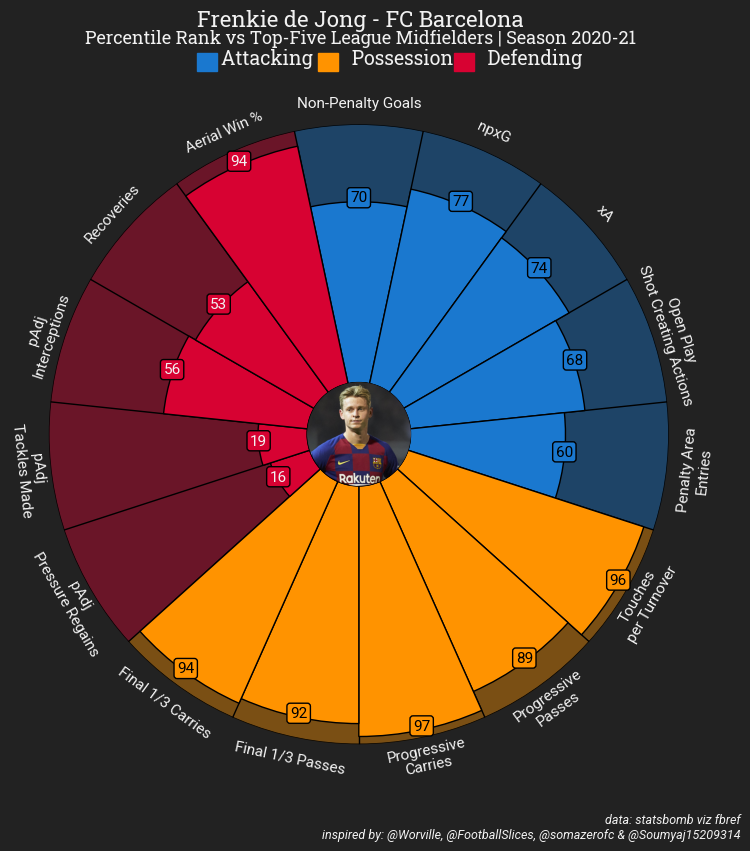

In [96]:
# parameter list
params = ["Non-Penalty Goals", "npxG", "xA", "Open Play\nShot Creating Actions",
          "\nPenalty Area\nEntries", "Touches\nper Turnover", "Progressive\nPasses",
          "Progressive\nCarries", "Final 1/3 Passes", "Final 1/3 Carries", "pAdj\nPressure Regains",
          "pAdj\nTackles Made", "pAdj\nInterceptions", "Recoveries", "Aerial Win %"]

# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [70, 77, 74, 68, 60, 96, 89, 97, 92, 94, 16, 19, 56, 53, 94]

# color for the slices and text
slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.975, "Frenkie de Jong - FC Barcelona", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.955,
    "Percentile Rank vs Top-Five League Midfielders | Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="right"
)

# add text
fig.text(
    0.34, 0.93, "Attacking        Possession       Defending", size=14,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()